<a href="https://colab.research.google.com/github/arallina/Laboratorio-DF/blob/main/Plantilla_A_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar archivo

In [1]:
import pandas as pd # librería para cargar el csv
import numpy as np # librería para trabajar con arrays (vectores y matrices)
import matplotlib.pyplot as plt # librería para graficar
from scipy.optimize import curve_fit # Función para hacer ajustes

#AVERIGUAR PARA QUE ES ESTO
import matplotlib as mlp

In [2]:

df = pd.read_excel("/content/drive/MyDrive/Clase 2.xlsx")
df.shape
df.head(5)

,Distancia entre carcazas (cm),delta t (us) microsegundos
0,0,162
1,1,190
2,2,220
3,3,250
4,4,278


In [3]:
datav = np.array(df)
Vinv = datav[:,0] #primera columna ya que se empieza a contar desde el 0
Voutv = datav[:,1]

print(Voutv) #para mostrar los datos de algún elemento

def lineal(x,a,b):
  return a*x+b

[162 190 220 250 278 306 336 366 396]


In [8]:
perr = np.sqrt(np.diag(ajuste)) # El error de la pendiente y de la ordenada
print('La pendiente es: ', a, ' +/- ', parameters[0][0] )
print('La ordenada es: ',b, ' +/- ', parameters[0][1] )  #DEBERÍA INDICARME EL ERROR ...ESTE STRING SALE DEL ARCHIVO AjustarDatos

La pendiente es:  29.20000000006151  +/-  29.20000000006151
La ordenada es:  161.4222222225721  +/-  161.4222222225721


la pendiente es 29.20000000006151  y la ordenada al origen: 161.4222222225721


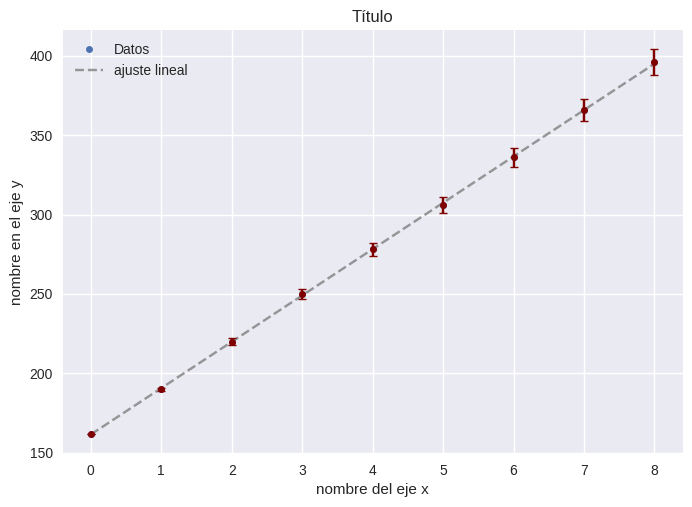

<Figure size 800x550 with 0 Axes>

In [48]:
#Creamos el gráfico de mínimos cuadrados
ajuste = [lineal(Vinv[i],a,b) for i in range(len(Vinv))] #parace ser lo mismo que "curve_fit..., pero aplicado a cada elemento por sepaarado"
parameters = curve_fit(lineal,Vinv,Voutv,[1,1]) #[1,1] para que sirve?

a = parameters[0][0]
b = parameters[0][1]#para que sirve?
plt.style.use('seaborn-v0_8') #estilo de fondo

#Mostrar gráfico del ajuste
plt.xlabel('nombre del eje x')
plt.ylabel('nombre en el eje y')

# Características de los datos
plt.plot(Vinv,Voutv,'.',markersize=10,label='Datos') #caracterización de cada elemento dado por x,y, "label (traducción: etiqueta) muestra el nombre de los puntos"
plt.plot(Vinv,ajuste,'--',label='ajuste lineal',color="grey",alpha=0.8)# se puede agregar más ajustes (color="", alpha=, etc)

plt.legend(fontsize=10,shadow=1)
plt.errorbar(Vinv,Voutv,yerr=Vinv,fmt='.', markersize=10, capsize=3, capthick=1,color='maroon')
plt.title("Título")
plt.figure()
print("la pendiente es",a," y la ordenada al origen:",b)
plt.show()

Residuos

29.20000000006151 161.4222222225721


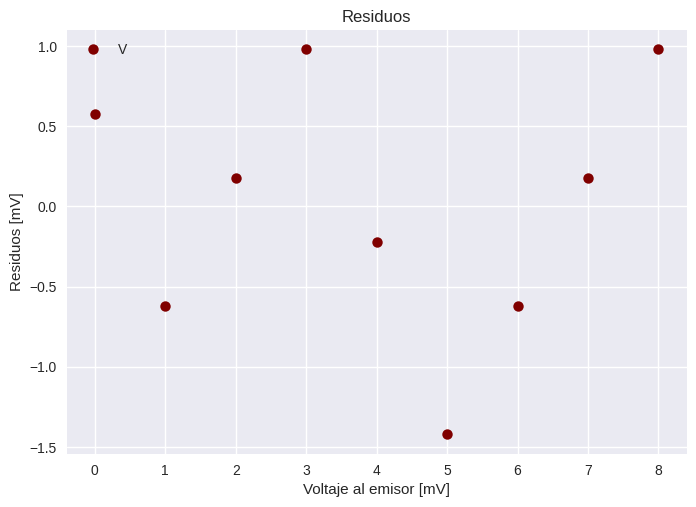

In [50]:
plt.figure()
plt.legend(fontsize=10,shadow=1)
plt.errorbar(Vinv, Voutv - ajuste,markersize=15,color='maroon', fmt='.')
plt.title("Residuos")
plt.ylabel("Residuos [mV]")
plt.xlabel('Voltaje al emisor [mV]')
print(a,b)
plt.legend("Va")
plt.show()